# Table of Contents
1. Exploratroy Data Analysis (EDA)
2. Data Preparation
3. Feature Selection
4. Determine Optimal Number of Clusters
5. Model Training
6. Customer Clustering
7. Predicting an Instance
8. Visualisation and Labelling
9. Optimise Cluster with Silhouette Method

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv("Telco-ANN.csv")
print('Dataset loaded successfully.')

Dataset loaded successfully.


# 1. Exploratroy Data Analysis (EDA)

In [3]:
# Displays the first few rows to understand the data structure
print('First few rows of the dataset:')
print (df.head())

First few rows of the dataset:
   Gender  SeniorCitizen Dependent  Tenure PhoneService MultipleLine  \
0  Female              0        No       1           No           No   
1    Male              0        No      34          Yes           No   
2    Male              0        No       2          Yes           No   
3    Male              0        No      45           No           No   
4  Female              0        No       2          Yes           No   

  InternetService        Contract  MonthlyCharge Churn  
0             DSL  Month-to-month          29.85    No  
1             DSL        One year          56.95    No  
2             DSL  Month-to-month          53.85   Yes  
3             DSL        One year          42.30    No  
4     Fiber optic  Month-to-month          70.70   Yes  


In [4]:
# Summary statistics showing an overview of numerical features
print('Descriptive statistics of the dataset:')
print (df.describe())

Descriptive statistics of the dataset:
       SeniorCitizen       Tenure  MonthlyCharge
count    7043.000000  7043.000000    7043.000000
mean        0.162147    32.371149      64.761692
std         0.368612    24.559481      30.090047
min         0.000000     0.000000      18.250000
25%         0.000000     9.000000      35.500000
50%         0.000000    29.000000      70.350000
75%         0.000000    55.000000      89.850000
max         1.000000    72.000000     118.750000


In [5]:
# Checks for missing values to identify if any imputation is required
print('Summary of missing values in the dataset:')
print(df.isnull().sum())

Summary of missing values in the dataset:
Gender             0
SeniorCitizen      0
Dependent          0
Tenure             0
PhoneService       0
MultipleLine       0
InternetService    0
Contract           0
MonthlyCharge      0
Churn              0
dtype: int64


Visualise the distributions of Tenure


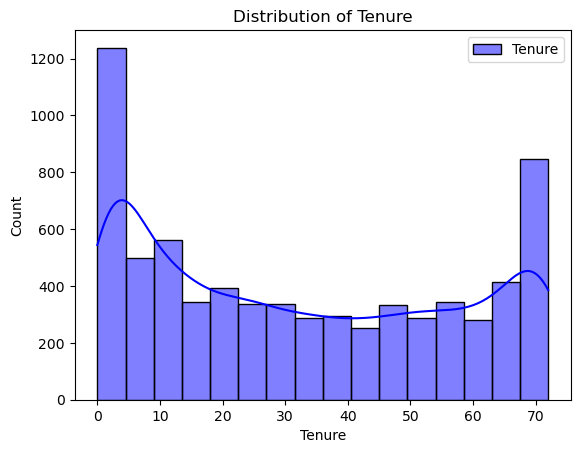

This plot shows the distribution of customer tenure across the dataset.


In [6]:
# Visualise the distribution of 'Tenure'
print('Visualise the distributions of Tenure')
sns.histplot(df['Tenure'], kde=True, color='blue', label='Tenure')
plt.title('Distribution of Tenure')
plt.legend()
plt.show()
print('This plot shows the distribution of customer tenure across the dataset.')

Visualise the distributions of MonthlyCharge


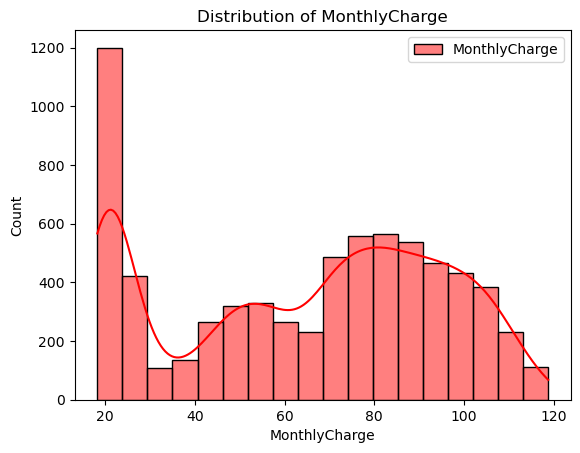

This plot shows how MonthlyCharges are distributed among customers.


In [7]:
# Visualise the distribution of 'MonthlyCharge'
print('Visualise the distributions of MonthlyCharge')
sns.histplot(df['MonthlyCharge'], kde=True, color='red', label='MonthlyCharge')
plt.title('Distribution of MonthlyCharge')
plt.legend()
plt.show()
print('This plot shows how MonthlyCharges are distributed among customers.')

# 2. Data Preparation

In [8]:
# Feature scaling 
print("Scaling Tenure and MonthlyCharge features to standardise the data for clustering.")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Tenure', 'MonthlyCharge']] = scaler.fit_transform(df[['Tenure', 'MonthlyCharge']])

Scaling Tenure and MonthlyCharge features to standardise the data for clustering.


# 3. Feature Selection

In [9]:
features = df_scaled[['Tenure', 'MonthlyCharge']]
print("Features selected for clustering: Tenure and MonthyCharge")

Features selected for clustering: Tenure and MonthyCharge


# 4. Determine Optimal Number of Clusters

Using the Elbow method to find the optimal number of clusters based on WCSS.


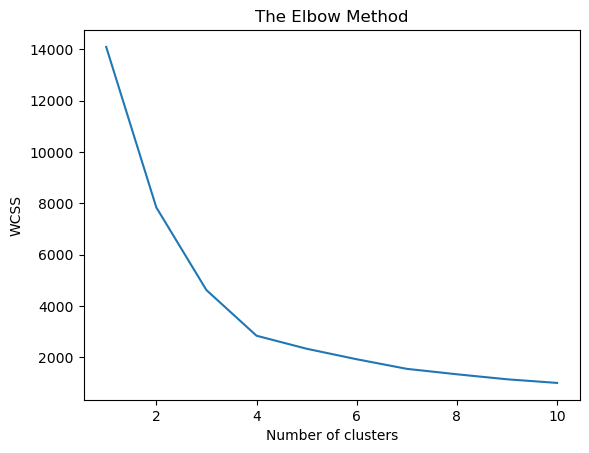

The Elbow Method plot helps in identifying the knee point, after which the reduction in WCSS becomes minimal. The elbow curve begins to level off around the 3 to 4 cluster range.  This observation suggests diminishing returns on cluster compactness beyone this point. Therefore, evaluating both 3 and 4 clusters is useful in determining which offers the best balance of simplicity and meaningful segmentation.


In [10]:
from sklearn.cluster import KMeans

print("Using the Elbow method to find the optimal number of clusters based on WCSS.")

# WCSS - Within-Cluster Sum of Square
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("The Elbow Method plot helps in identifying the knee point, after which the reduction in WCSS becomes minimal. The elbow curve begins to level off around the 3 to 4 cluster range.  This observation suggests diminishing returns on cluster compactness beyone this point. Therefore, evaluating both 3 and 4 clusters is useful in determining which offers the best balance of simplicity and meaningful segmentation.")

# 5. Model Training

In [11]:
# Training the models with 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)

# Fit the models and predict clusters
labels_3 = kmeans_3.fit_predict(features)
labels_4 = kmeans_4.fit_predict(features)
print("Model trained successfully with both 3 and 4 clusters.")

Model trained successfully with both 3 and 4 clusters.


# 6. Customer Clustering

In [12]:
# Assigning Clusters to Customers
# Label each customer with their respective cluster number
df_scaled['Cluster_3'] = labels_3
df_scaled['Cluster_4'] = labels_4
print("Customers now have cluster labels.")

Customers now have cluster labels.


# 7. Predicting an Instance

In [13]:
# Predicting the cluster for a new instance for both models
new_instance_scaled = scaler.transform([[10,20]])

new_cluster_3 = kmeans_3.predict(new_instance_scaled)
new_cluster_4 = kmeans_4.predict(new_instance_scaled)

print(f"The new instance belongs to cluster {new_cluster_3[0]} in the 3-cluster model.")
print(f"The new instance belongs to cluster {new_cluster_4[0]} in the 4-cluster model.")

The new instance belongs to cluster 2 in the 3-cluster model.
The new instance belongs to cluster 0 in the 4-cluster model.


C:\Users\marce\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# 8. Visualisation and Labelling

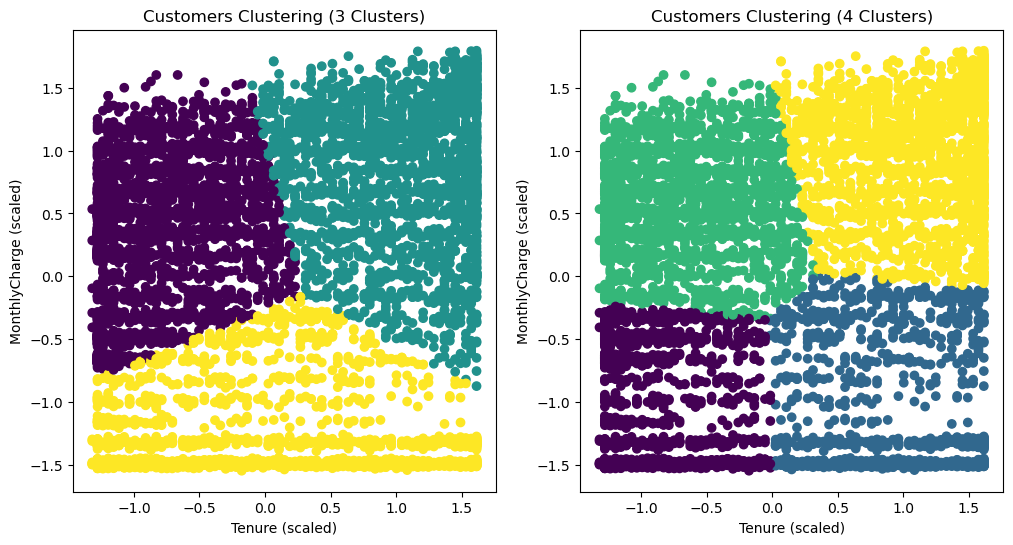

Each colour represents a different cluster, showing how the model groups customers.


In [14]:
# Visualising Customer Clusters for 3-cluster model and 4-cluster model
# Shows how customers are grouped based on tenure and charges

# Visualise clusters for 3-cluster model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2 ,1)
plt.scatter(df_scaled['Tenure'], df_scaled['MonthlyCharge'], c=df_scaled['Cluster_3'], cmap='viridis')
plt.title('Customers Clustering (3 Clusters)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('MonthlyCharge (scaled)')

# Visualise clusters for 4-cluster model
plt.subplot(1, 2 ,2)
plt.scatter(df_scaled['Tenure'], df_scaled['MonthlyCharge'], c=df_scaled['Cluster_4'], cmap='viridis')
plt.title('Customers Clustering (4 Clusters)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('MonthlyCharge (scaled)')
plt.show()

print("Each colour represents a different cluster, showing how the model groups customers.")

# 9. Optimise Cluster with Silhouette Method

In [15]:
# Evaluating Cluster Effectiveness:
# The silhoutte score helps to understand how similar an object is to other clusters.  
# The closer the score it to 1, the better the clustering.
# Calculate silhouette scores for both cluster options

silhouette_avg_3 = silhouette_score(features, labels_3)
silhouette_avg_4 = silhouette_score(features, labels_4)

print(f"Silhouette Score for 3 clusters: {silhouette_avg_3}")
print(f"Silhouette Score for 4 clusters: {silhouette_avg_4}")
print("A higher silhouette score suggests better-defined clusters.")

Silhouette Score for 3 clusters: 0.44646399712049467
Silhouette Score for 4 clusters: 0.4761809950225301
A higher silhouette score suggests better-defined clusters.


In [16]:
# Decision based on Silhouette Scores
if silhouette_avg_4 > silhouette_avg_3:
    print("4 clusters is the optimal number due to a higher silhouette score, indicating better cluster separtation and cohesion.")
else:
    print("3 clusters is the optimal number due to a higher silhouette score, indicating better cluster separtation and cohesion.")


4 clusters is the optimal number due to a higher silhouette score, indicating better cluster separtation and cohesion.
